In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)
N = 10000

data = {
    "temperature": np.random.normal(37, 1.2, N),
    "heart_rate": np.random.normal(85, 20, N),
    "spo2": np.random.normal(96, 3, N),
    "resp_rate": np.random.normal(18, 5, N)
}

df = pd.DataFrame(data)

# Sepsis risk rule
def label(row):
    score = 0
    if row["temperature"] > 38: score += 1
    if row["heart_rate"] > 100: score += 1
    if row["spo2"] < 92: score += 1
    if row["resp_rate"] > 22: score += 1
    return 1 if score >= 2 else 0

df["sepsis"] = df.apply(label, axis=1)

df.to_csv("sepsis_dataset.csv", index=False)
print("Synthetic dataset generated.")


Synthetic dataset generated.


Preprocessing completed.


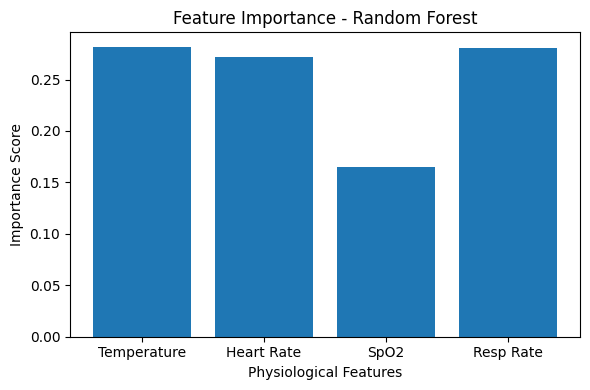

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("/content/sepsis_dataset.csv")

X = df.drop("sepsis", axis=1)
y = df["sepsis"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Preprocessing completed.")

# -----------------------------
# Train Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -----------------------------
# Feature Importance Plot
# -----------------------------
features = ["Temperature", "Heart Rate", "SpO2", "Resp Rate"]
importances = rf.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(features, importances)
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Physiological Features")
plt.tight_layout()
plt.show()


RF Accuracy: 0.9995
Model saved.


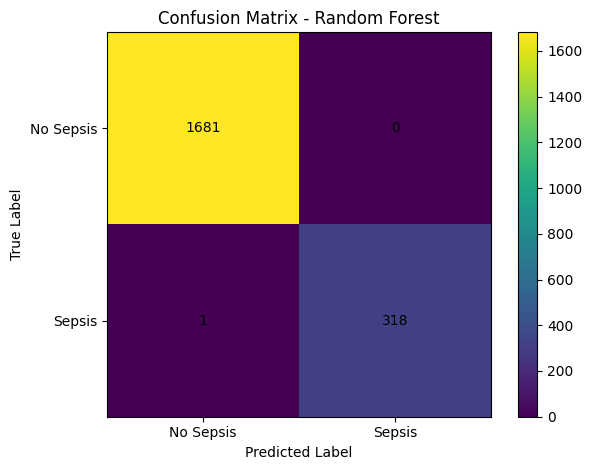

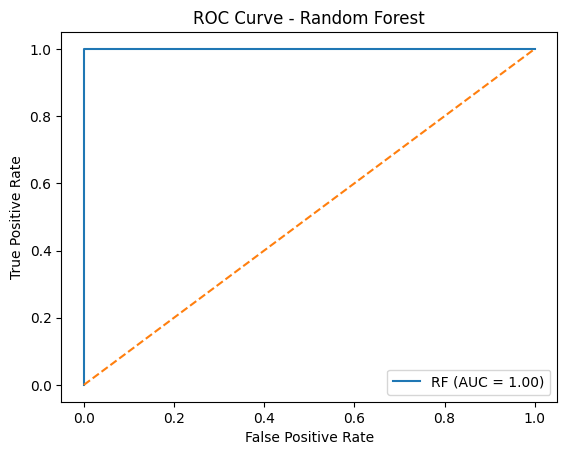

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import joblib
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("RF Accuracy:", accuracy)

joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model saved.")
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()
plt.xticks([0, 1], ["No Sepsis", "Sepsis"])
plt.yticks([0, 1], ["No Sepsis", "Sepsis"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"RF (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()



In [8]:
import numpy as np
import joblib
import time

rf = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

def simulate_patient(pid):
    temp = np.random.uniform(36, 40)
    hr = np.random.uniform(60, 130)
    spo2 = np.random.uniform(88, 100)
    rr = np.random.uniform(12, 30)

    X = scaler.transform([[temp, hr, spo2, rr]])
    risk = rf.predict(X)[0]

    return {
        "patient": pid,
        "temperature": round(temp, 2),
        "heart_rate": int(hr),
        "spo2": int(spo2),
        "resp_rate": int(rr),
        "risk": "HIGH" if risk else "LOW"
    }

try:
    while True:
        for i in range(1, 4):  # 3 ICU patients
            print(simulate_patient(f"ICU_{i}"))
        print("-" * 40)
        time.sleep(2)

except KeyboardInterrupt:
    print("\nSimulation stopped safely.")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'patient': 'ICU_1', 'temperature': 39.33, 'heart_rate': 84, 'spo2': 96, 'resp_rate': 12, 'risk': 'LOW'}
{'patient': 'ICU_2', 'temperature': 37.86, 'heart_rate': 125, 'spo2': 91, 'resp_rate': 12, 'risk': 'HIGH'}
{'patient': 'ICU_3', 'temperature': 38.33, 'heart_rate': 84, 'spo2': 92, 'resp_rate': 22, 'risk': 'HIGH'}
----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'patient': 'ICU_1', 'temperature': 38.49, 'heart_rate': 90, 'spo2': 94, 'resp_rate': 29, 'risk': 'HIGH'}
{'patient': 'ICU_2', 'temperature': 39.83, 'heart_rate': 109, 'spo2': 89, 'resp_rate': 18, 'risk': 'HIGH'}
{'patient': 'ICU_3', 'temperature': 39.53, 'heart_rate': 89, 'spo2': 99, 'resp_rate': 20, 'risk': 'LOW'}
----------------------------------------

Simulation stopped safely.


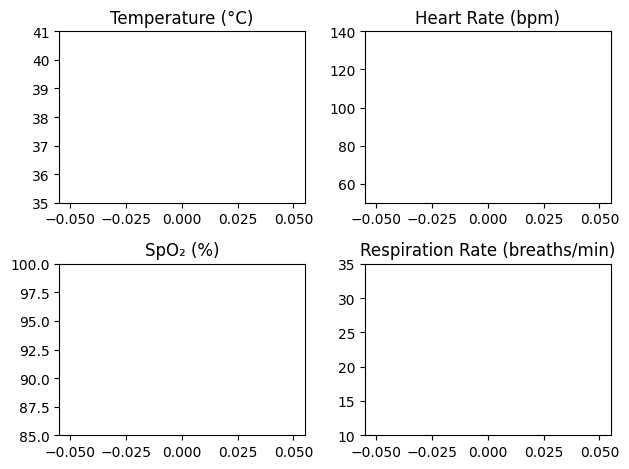

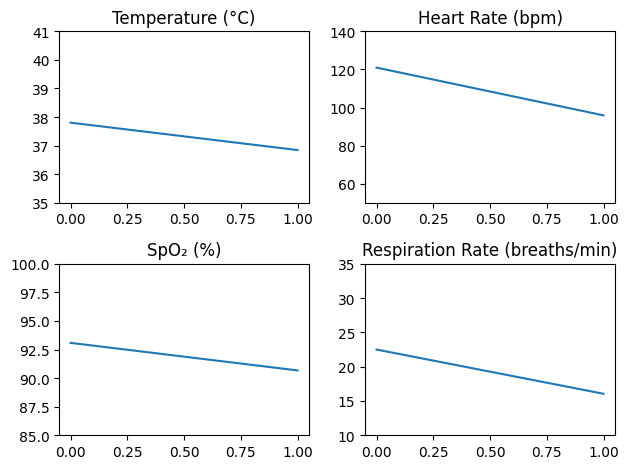

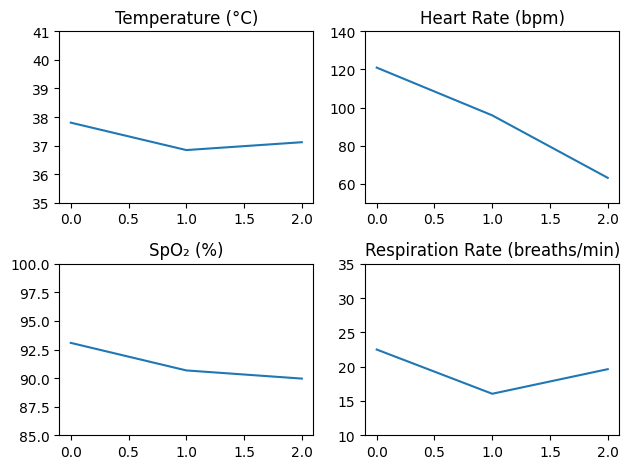

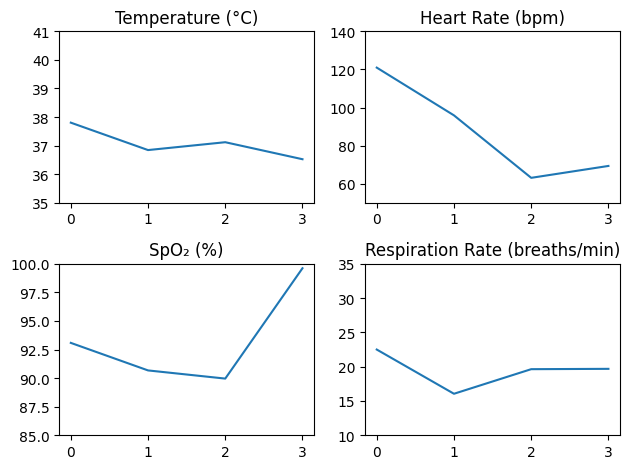

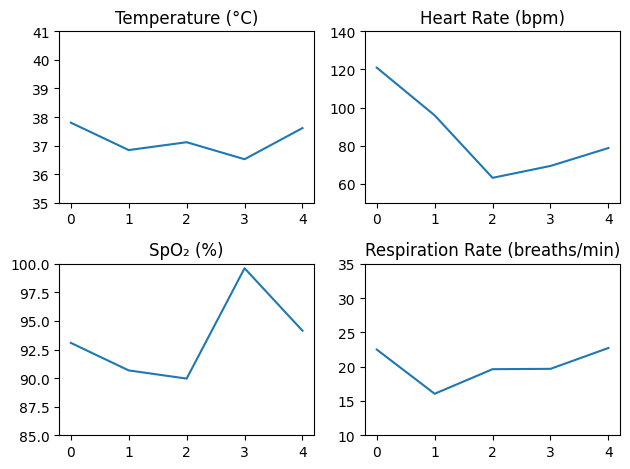

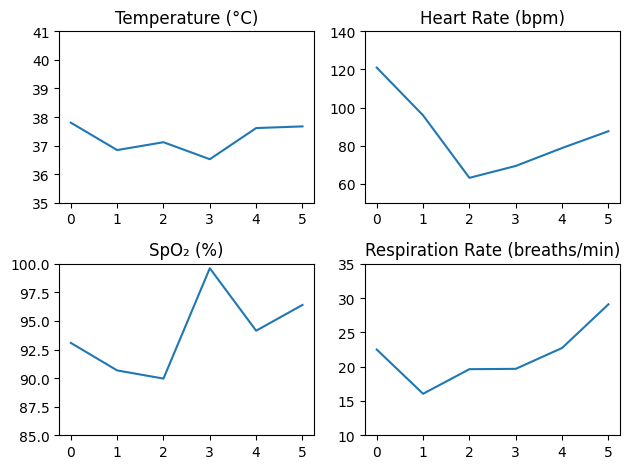

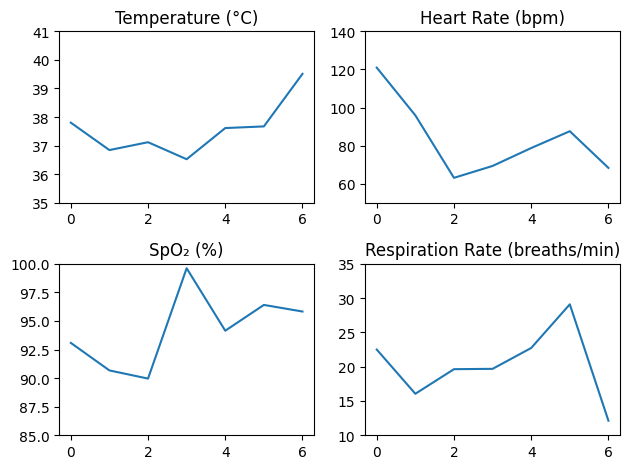

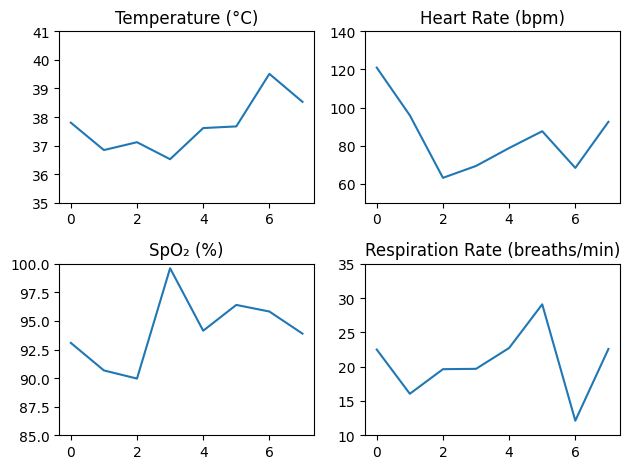

Real-time monitoring stopped.


In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.ion()

temp_data, hr_data, spo2_data, rr_data = [], [], [], []

try:
    while True:
        # Simulated vitals
        temp = np.random.uniform(36, 40)
        hr = np.random.uniform(60, 130)
        spo2 = np.random.uniform(88, 100)
        rr = np.random.uniform(12, 30)

        # Append data
        temp_data.append(temp)
        hr_data.append(hr)
        spo2_data.append(spo2)
        rr_data.append(rr)

        # Keep last 50 samples
        for data in [temp_data, hr_data, spo2_data, rr_data]:
            if len(data) > 50:
                data.pop(0)

        plt.clf()

        # Temperature
        plt.subplot(2, 2, 1)
        plt.plot(temp_data)
        plt.title("Temperature (°C)")
        plt.ylim(35, 41)

        # Heart Rate
        plt.subplot(2, 2, 2)
        plt.plot(hr_data)
        plt.title("Heart Rate (bpm)")
        plt.ylim(50, 140)

        # SpO2
        plt.subplot(2, 2, 3)
        plt.plot(spo2_data)
        plt.title("SpO₂ (%)")
        plt.ylim(85, 100)

        # Respiration Rate
        plt.subplot(2, 2, 4)
        plt.plot(rr_data)
        plt.title("Respiration Rate (breaths/min)")
        plt.ylim(10, 35)

        plt.tight_layout()
        plt.pause(0.5)

except KeyboardInterrupt:
    plt.ioff()
    plt.close()
    print("Real-time monitoring stopped.")


In [28]:
import hashlib

def hash_file(file):
    sha = hashlib.sha256()
    with open(file, "rb") as f:
        sha.update(f.read())
    return sha.hexdigest()

with open("model_hash.txt", "w") as f:
    f.write(hash_file("rf_model.pkl"))

print("Model hash stored securely")


Model hash stored securely


In [29]:
import joblib
import hashlib

# --------------------------
# Load model & scaler
# --------------------------
rf = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# --------------------------
# Model integrity check
# --------------------------
def calculate_hash(file):
    sha = hashlib.sha256()
    with open(file, "rb") as f:
        sha.update(f.read())
    return sha.hexdigest()

stored_hash = open("model_hash.txt").read().strip()
current_hash = calculate_hash("rf_model.pkl")

assert stored_hash == current_hash, "Model integrity compromised!"

print("✅ Model integrity verified")

# --------------------------
# Secure inference function
# --------------------------
def secure_predict(data):
    temp = float(data["temperature"])
    hr = float(data["heart_rate"])
    spo2 = float(data["spo2"])
    rr = float(data["resp_rate"])

    # Validation
    if not (30 <= temp <= 45): raise ValueError("Temp out of range")
    if not (30 <= hr <= 200): raise ValueError("HR out of range")
    if not (50 <= spo2 <= 100): raise ValueError("SpO2 out of range")
    if not (5 <= rr <= 60): raise ValueError("RR out of range")

    X = scaler.transform([[temp, hr, spo2, rr]])
    prob = rf.predict_proba(X)[0][1]

    return {
        "risk": "HIGH" if prob > 0.5 else "LOW",
        "probability": round(prob, 3)
    }

# --------------------------
# Test (Colab-safe)
# --------------------------
sample = {
    "temperature": 38.6,
    "heart_rate": 112,
    "spo2": 91,
    "resp_rate": 25
}

print(secure_predict(sample))


✅ Model integrity verified
{'risk': 'HIGH', 'probability': np.float64(1.0)}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
